<a href="https://colab.research.google.com/github/Larr014/DataMining/blob/master/Ejemplo_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [47]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
df =df.drop(['PassengerId','Name','SibSp','Parch',"Ticket","Fare","Cabin","Embarked"],axis=1)
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [55]:
df['Sex']  = [1 if x=="female" else 0 for x in df['Sex']]
df['Sex']

<ipython-input-55-d921b5cf4f5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']  = [1 if x=="female" else 0 for x in df['Sex']]


0      0
1      1
2      1
3      1
4      0
      ..
885    1
886    0
887    1
889    0
890    0
Name: Sex, Length: 714, dtype: int64

In [56]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
885,0,3,1,39.0
886,0,2,0,27.0
887,1,1,1,19.0
889,1,1,0,26.0


In [57]:
X = df.copy()
X = X.drop(['Survived'], axis=1)
X

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Survived'],
                                                    test_size=0.2, random_state=6#42
                                                    )

In [59]:
X_train

,Pclass,Sex,Age
512,1,0,36.0
844,3,0,17.0
392,3,0,28.0
263,1,0,40.0
68,3,1,17.0
...,...,...,...
418,2,0,30.0
455,3,0,29.0
775,3,0,18.0
282,3,0,16.0


In [60]:
X_test

,Pclass,Sex,Age
244,3,0,30.0
331,1,0,45.5
520,1,1,30.0
395,3,0,22.0
554,3,1,22.0
...,...,...,...
13,3,0,39.0
662,1,0,47.0
765,1,1,51.0
243,3,0,22.0


In [61]:
y_train

512    1
844    0
392    0
263    0
68     1
      ..
418    0
455    1
775    0
282    0
890    0
Name: Survived, Length: 571, dtype: int64

In [62]:
y_test

244    0
331    0
520    1
395    0
554    1
      ..
13     0
662    0
765    1
243    0
549    1
Name: Survived, Length: 143, dtype: int64

Se implementa el algoritmo

In [63]:
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
885,0,3,1,39.0
886,0,2,0,27.0
887,1,1,1,19.0
889,1,1,0,26.0


In [64]:
df.drop(['Survived'], axis=1)

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


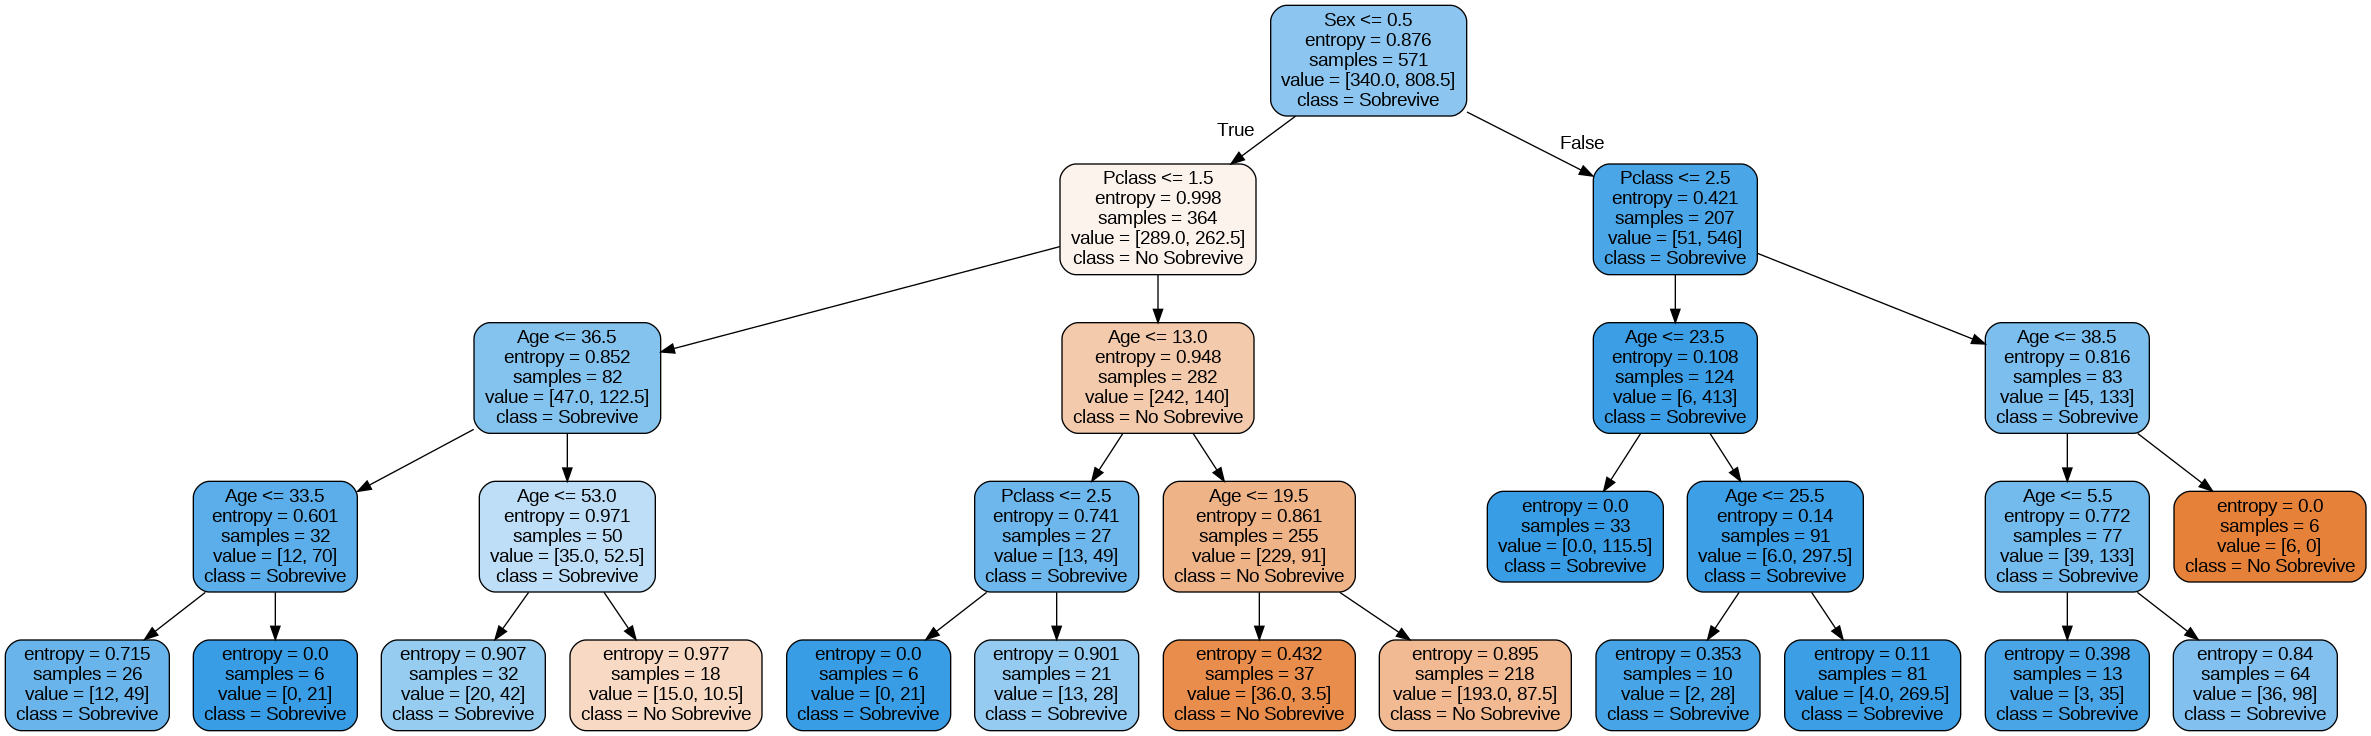

In [66]:
from sklearn import tree
from subprocess import check_call
from IPython.display import Image as PImage
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(X_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(df.drop(['Survived'], axis=1)),
                              class_names = ['No Sobrevive', 'Sobrevive'],
                              rounded = True,
                              filled= True )

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")